In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

In [4]:
seed = 111
np.random.seed(seed)
sns.set(style="white")

color_names = ["red",
               "windows blue",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "light cyan",
               "steel blue",
               "pastel purple",
               "mint",
               "salmon"]

colors = sns.xkcd_palette(color_names)

In [5]:
def _plot_segments(ax, segmentation, ymin, ymax):
    s_seq = np.squeeze(segmentation)
    z_cps = np.concatenate(
        ([0], np.where(np.diff(s_seq))[0]+1, [s_seq.size]))
    for start, stop in zip(z_cps[:-1], z_cps[1:]):
        stop = min(s_seq.size, stop+1)
        ax.axvspan(
            start, stop-1, ymin=ymin, ymax=ymax,
            alpha=.8, facecolor=colors[s_seq[start]])

In [35]:
np.random.randn(1)

array([0.60226948])

In [61]:
def make_seq(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    v = np.random.uniform(-0.5, 0.5)
    for i in range(T):
        z_seq.append(0 if v < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        y += v
        if y > h:
            v = -v
        elif y < 0:
            v = -v
    return np.array(seq), np.array(z_seq)

In [ ]:
def make_seq_noise(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    v = np.random.uniform(-0.5, 0.5)
    for i in range(T):
        z_seq.append(0 if v < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        y += v
        if y > h:
            v = -v
        elif y < 0:
            v = -v
    return np.array(seq), np.array(z_seq)

In [54]:
def calculate_segment_lengths(z_seq):

    lengths = []
    current_length = 1
    
    for i in range(1, len(z_seq)):
        if z_seq[i] == z_seq[i-1]:
            current_length += 1
        else:
            lengths.append(current_length)
            current_length = 1
    
    # Append the last segment length
    lengths.append(current_length)
    
    return lengths

# Example usage:
y_seq, z_seq = make_seq()
segment_lengths = calculate_segment_lengths(z_seq)
print("Segment lengths:", segment_lengths)
print("Number of segments:", len(segment_lengths))
print("Average segment length:", np.mean(segment_lengths))

Segment lengths: [100]
Number of segments: 1
Average segment length: 100.0


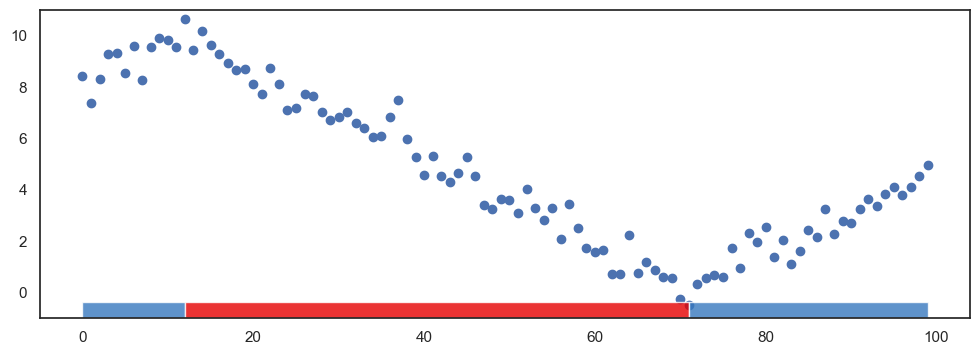

In [60]:
y_seq, z_seq = make_seq()
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [9]:
data_y = []
data_z = []
for i in tqdm(range(100000)):
    dy, dz = make_seq()
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 100000/100000 [00:33<00:00, 3029.56it/s]


((100000, 100, 1), (100000, 100))

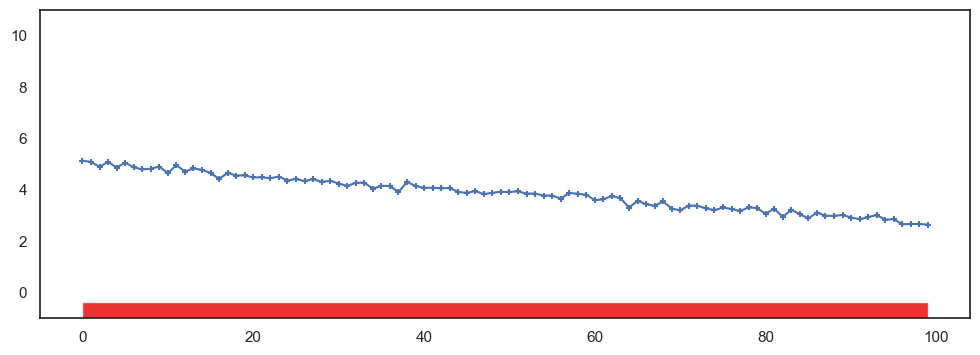

In [10]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq, s=25, marker='+')
ax.plot(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [11]:
np.savez('bouncing_ball.npz', y=data_y, z=data_z)

In [12]:
data_y = []
data_z = []
for i in tqdm(range(1000)):
    dy, dz = make_seq(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 1000/1000 [00:00<00:00, 1953.63it/s]


((1000, 150, 1), (1000, 150))

In [ ]:
np.savez('bouncing_ball_test.npz', y=data_y, z=data_z)